In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

## Check data

In [4]:
PATH = '/home/len/kaggle/GLRC/data/'

In [5]:
# How many images downloaded now ...
!ls -l {PATH} | wc -l

55576


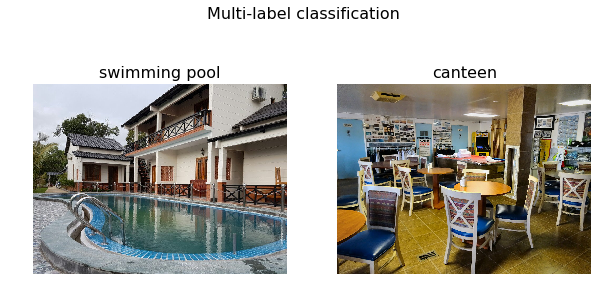

In [6]:
list_paths = [f"{PATH}556ad70775d53aea.jpg", f"{PATH}66e2f3d248cd81e2.jpg"]
titles=["swimming pool", "canteen"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

## Model

In [8]:
import pandas as pd
# max_rows = 1225029 out of memory
# max_rows = 12250 OK
max_rows = 12250
df = pd.read_csv('train.csv', nrows=max_rows)
for index, row in df.iterrows():
    if not os.path.isfile(PATH + row['id'] + '.jpg'):
        df.drop(index, inplace=True)
        
df = df.drop(columns =['url'])
df.to_csv('train_min.csv', index = False)


df = pd.read_csv('test.csv', nrows=max_rows)
for index, row in df.iterrows():
    if not os.path.isfile(PATH + row['id'] + '.jpg'):
        df.drop(index, inplace=True)
        
df = df.drop(columns =['url'])
df.to_csv('test_min.csv', index = False)

In [9]:
label_csv = f'{PATH}../train_min.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [10]:
print(n)

600


In [18]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, '', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='')

In [19]:
data = get_data(256)

In [20]:
sz=64

In [22]:
data = get_data(sz)
data = data.resize(int(sz*1.3), 'tmp')


f_model = resnet34
learn = ConvLearner.pretrained(f_model, data, precompute=True)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))






  0%|          | 0/8 [00:00<?, ?it/s]

error: /io/opencv/modules/imgproc/src/color.cpp:11079: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [15]:
lrf=learn.lr_find()
learn.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/8 [00:00<?, ?it/s]


error: /io/opencv/modules/imgproc/src/color.cpp:11079: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [ ]:
log_preds,y = learn.TTA()

In [ ]:
preds = np.mean(np.exp(log_preds),0)